## This Assignment Submitted to SoluLab  
       prepared by Pramod(988979XXX4)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split

%matplotlib inline


In [2]:
input_path = Path('C:/Users/Vaidy/Desktop/Coin_Classification/Old/classification_dataset/all')
im_size = 3059

In [3]:
image_files = list(input_path.glob('*.jpg'))

In [4]:
def read_file(fname):
    # Read image
    im = Image.open(fname)

    # Resize
    im.thumbnail((im_size, im_size))

    # Convert to numpy array
    im_array = np.asarray(im)

    # Get target
    target = int(fname.stem.split('_')[0])

    return im_array, target

In [5]:
images = []
targets = []

for image_file in tqdm_notebook(image_files):
    image, target = read_file(image_file)
    
    images.append(image)
    targets.append(target)

<ipython-input-5-00e18b85ec13>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for image_file in tqdm_notebook(image_files):


  0%|          | 0/1540 [00:00<?, ?it/s]

In [6]:
#X = (np.array(images).astype(np.float32) / 127.5) - 1
#y_cls = np.array(targets)

In [7]:
X1 = np.array(images).astype(np.float32)

In [9]:
X = (X1 / 127.5) - 1
y_cls = np.array(targets)

In [10]:
X.shape, y_cls.shape

((1540, 480, 640, 3), (1540,))

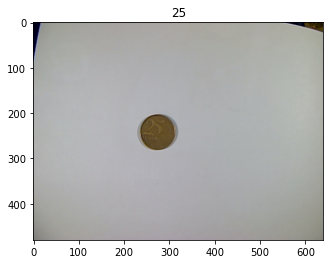

In [11]:
i = 555
plt.imshow(np.uint8((X[i] + 1) * 127.5))
plt.title(str(y_cls[i]));

In [12]:
coins_ids = {
    5: 0,
    10: 1,
    25: 2,
    50: 3,
    100: 4
}

ids_coins = [5, 10, 25, 50, 100]

y = np.array([coins_ids[coin] for coin in y_cls])

In [13]:
X_train, X_valid, y_train, y_valid, fname_train, fname_valid = train_test_split(
    X, y, image_files, test_size=0.2, random_state=42)

In [14]:
im_width = X.shape[2]
im_height = X.shape[1]

im_width, im_height

(640, 480)

In [15]:
from keras.layers import Conv2D, MaxPool2D, Flatten, GlobalAvgPool2D, GlobalMaxPool2D, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

In [16]:
model = Sequential()

# CNN network
model.add( Conv2D(16, 3, activation='relu', padding='same', input_shape=(im_height, im_width, 3)) )
model.add( MaxPool2D(2) )

model.add( Conv2D(32, 3, activation='relu', padding='same') )
model.add( MaxPool2D(2) )

model.add( Conv2D(64, 3, activation='relu', padding='same') )
model.add( MaxPool2D(2) )

model.add( Conv2D(128, 3, activation='relu', padding='same') )
model.add( MaxPool2D(2) )

model.add( Conv2D(256, 3, activation='relu', padding='same') )

# Transition between CNN and MLP
model.add( GlobalAvgPool2D() )

# MLP network
model.add( Dense(256, activation='relu') )

model.add( Dense(5, activation='softmax') )

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 480, 640, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 240, 320, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 240, 320, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 120, 160, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 120, 160, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 60, 80, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 80, 128)       7

In [17]:
optim = Adam(lr=1e-3)
model.compile(optim, 'sparse_categorical_crossentropy', metrics=['acc'])

In [22]:
callbacks = [
    ReduceLROnPlateau(patience=5, factor=0.1, verbose=True),
    ModelCheckpoint('best.model', save_best_only=True),
    EarlyStopping(patience=12)
]

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), batch_size=32,
                   callbacks=callbacks)

Epoch 1/20
39/39 [==============================] - 1004s 25s/step - loss: 1.5398 - acc: 0.2833 - val_loss: 1.4670 - val_acc: 0.3539
INFO:tensorflow:Assets written to: best.model\assets


INFO:tensorflow:Assets written to: best.model\assets


Epoch 2/20
39/39 [==============================] - 963s 25s/step - loss: 1.3508 - acc: 0.3758 - val_loss: 1.1508 - val_acc: 0.5130
INFO:tensorflow:Assets written to: best.model\assets


INFO:tensorflow:Assets written to: best.model\assets


Epoch 3/20
39/39 [==============================] - 1056s 27s/step - loss: 1.0393 - acc: 0.5666 - val_loss: 0.9390 - val_acc: 0.6169
INFO:tensorflow:Assets written to: best.model\assets


INFO:tensorflow:Assets written to: best.model\assets


Epoch 4/20
39/39 [==============================] - 1085s 28s/step - loss: 0.8085 - acc: 0.6834 - val_loss: 0.7632 - val_acc: 0.6916
INFO:tensorflow:Assets written to: best.model\assets


INFO:tensorflow:Assets written to: best.model\assets


Epoch 5/20
39/39 [==============================] - 1005s 26s/step - loss: 0.6333 - acc: 0.7808 - val_loss: 0.7077 - val_acc: 0.7500
INFO:tensorflow:Assets written to: best.model\assets


INFO:tensorflow:Assets written to: best.model\assets


Epoch 6/20
39/39 [==============================] - 1024s 26s/step - loss: 0.5347 - acc: 0.8028 - val_loss: 0.6326 - val_acc: 0.8312
INFO:tensorflow:Assets written to: best.model\assets


INFO:tensorflow:Assets written to: best.model\assets


Epoch 7/20
39/39 [==============================] - 1011s 26s/step - loss: 0.6000 - acc: 0.7833 - val_loss: 0.6638 - val_acc: 0.8312
Epoch 8/20
39/39 [==============================] - 980s 25s/step - loss: 0.6350 - acc: 0.7914 - val_loss: 0.9221 - val_acc: 0.7305
Epoch 9/20
39/39 [==============================] - 1008s 26s/step - loss: 0.5149 - acc: 0.8385 - val_loss: 0.6895 - val_acc: 0.7435
Epoch 10/20
39/39 [==============================] - 1037s 27s/step - loss: 0.3909 - acc: 0.8669 - val_loss: 0.5369 - val_acc: 0.8669
INFO:tensorflow:Assets written to: best.model\assets


INFO:tensorflow:Assets written to: best.model\assets


Epoch 11/20
39/39 [==============================] - 1013s 26s/step - loss: 0.4461 - acc: 0.8547 - val_loss: 0.5490 - val_acc: 0.8571
Epoch 12/20
39/39 [==============================] - 1132s 29s/step - loss: 0.3381 - acc: 0.8807 - val_loss: 0.4323 - val_acc: 0.8864
INFO:tensorflow:Assets written to: best.model\assets


INFO:tensorflow:Assets written to: best.model\assets


Epoch 13/20
39/39 [==============================] - 1079s 28s/step - loss: 0.2863 - acc: 0.9034 - val_loss: 0.3469 - val_acc: 0.9221
INFO:tensorflow:Assets written to: best.model\assets


INFO:tensorflow:Assets written to: best.model\assets


Epoch 14/20
39/39 [==============================] - 1081s 28s/step - loss: 0.2494 - acc: 0.9140 - val_loss: 0.7950 - val_acc: 0.7370
Epoch 15/20
39/39 [==============================] - 1018s 26s/step - loss: 0.2723 - acc: 0.9018 - val_loss: 0.2750 - val_acc: 0.9286
INFO:tensorflow:Assets written to: best.model\assets


INFO:tensorflow:Assets written to: best.model\assets


Epoch 16/20
39/39 [==============================] - 1076s 28s/step - loss: 0.1896 - acc: 0.9343 - val_loss: 0.3695 - val_acc: 0.9253
Epoch 17/20
39/39 [==============================] - 1178s 30s/step - loss: 0.4927 - acc: 0.8539 - val_loss: 1.9583 - val_acc: 0.4740
Epoch 18/20
39/39 [==============================] - 1192s 31s/step - loss: 0.5468 - acc: 0.8198 - val_loss: 0.4127 - val_acc: 0.8961
Epoch 19/20
39/39 [==============================] - 1175s 30s/step - loss: 0.2956 - acc: 0.9115 - val_loss: 0.3429 - val_acc: 0.9253
Epoch 20/20
39/39 [==============================] - 1297s 33s/step - loss: 0.2096 - acc: 0.9367 - val_loss: 0.2409 - val_acc: 0.9156
INFO:tensorflow:Assets written to: best.model\assets


INFO:tensorflow:Assets written to: best.model\assets


Epoch 1/20
39/39 [==============================] - 1699s 43s/step - loss: 0.2085 - acc: 0.9261 - val_loss: 0.2040 - val_acc: 0.9383
INFO:tensorflow:Assets written to: best.model\assets


INFO:tensorflow:Assets written to: best.model\assets


Epoch 2/20
 8/39 [=====>........................] - ETA: 23:06 - loss: 0.1883 - acc: 0.9375

KeyboardInterrupt: 

In [23]:
df_history = pd.DataFrame(history.history)

(0.9, 1.0)

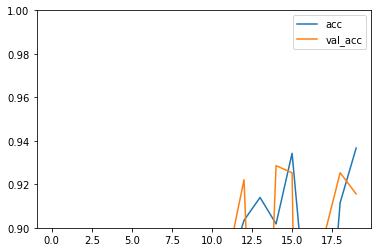

In [24]:
ax = df_history[['acc', 'val_acc']].plot()
ax.set_ylim(0.9, 1)

In [25]:
df_history['val_acc'].max()

0.9285714030265808

In [44]:
model.load_weights('C:/Users/Vaidy/Desktop/Coin_Classification/best.model.h5')

In [45]:
model.evaluate(X_valid, y_valid)

10/10 [==============================] - 53s 5s/step - loss: 0.2670 - acc: 0.9221


[0.2669757604598999, 0.9220778942108154]

In [46]:
y_pred = model.predict(X_valid)

In [47]:
y_pred_cls = y_pred.argmax(1)

In [48]:
errors = np.where(y_pred_cls != y_valid)[0]
errors

array([  2,   5,   9,  34,  36,  39,  62,  92, 105, 113, 150, 153, 206,
       208, 213, 219, 225, 232, 256, 275, 281, 283, 303, 306], dtype=int64)

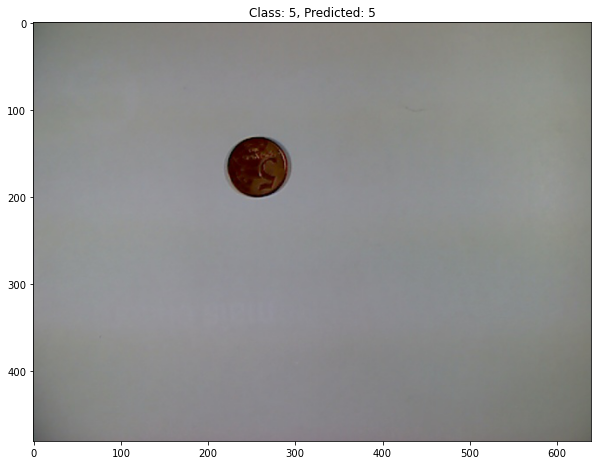

In [49]:
i = 55
plt.figure(figsize=(10, 10))
im = Image.open(fname_valid[i])
plt.imshow(np.uint8(im), interpolation='bilinear')
plt.title('Class: {}, Predicted: {}'.format(ids_coins[y_valid[i]], ids_coins[np.argmax(y_pred[i])]));